## Tasks
### Data Processing
### Number 1.
Read in the provided ACW Data using the CSV library.

In [1]:
# import libraries
import csv
import json
import os
import sys

### Number 2
As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably: a. Vehicle - consists of make, model, year, and type b. Credit Card - consists of start date, end date, number, security code, and IBAN. c. Address - consists of the main address, city, and postcode.

For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above.

Note: Ensure that the values read in are appropriately cast to their respective types.

In [2]:
# container for the entries
Entries=[]
#function to read or write the data format csv/json, with the open function()
# a is the name of the file, b is the mode either read or write, c is the iterable object it is reading from.
def add_entry(a,b,c):
    with open(a,mode=b) as file:
        # load csv file data using csv library's dictionary reader
        csv_reader = csv.DictReader(file, delimiter = ',')
        #convert each entry into python dictionary
        for entry in csv_reader:
            c.append({'First Name': entry['First Name'],
                      'Last Name':entry['Last Name'], 
                      'Age (Years)':entry['Age (Years)'],
                      'Sex':entry['Sex'],
                      'Retired': entry['Retired'],
                      'Marital Status':entry['Marital Status'],
                      'Dependants':entry['Dependants'],
                      'Yearly Salary (GBP)':entry['Yearly Salary (GBP)'],
                      'Yearly Pension (GBP)':entry['Yearly Pension (GBP)'],
                      'Employer Company':entry['Employer Company'],
                      'Distance Commuted to Work (Miles)': entry['Distance Commuted to Work (miles)'],
                      'Vehicle':{'Make':entry['Vehicle Make'],'Model':entry['Vehicle Model'],
                                  'Type':entry['Vehicle Type'],'Year':entry['Vehicle Year']},
                      'Credit Card':{'Credit Card Number':(entry['Credit Card Number']),
                                      'Credit Card Start Date':entry['Credit Card Start Date'],
                                      'Credit Card Expiry Date':entry['Credit Card Expiry Date'],
                                      'Credit Card CVV':(entry['Credit Card CVV']),
                                      'Bank IBAN':entry['Bank IBAN']},
                      'Address':{'Address Street':entry['Address Street'],
                                  'Address City':entry['Address City'],
                                  'Address Postcode':entry['Address Postcode']}}),

#function to write to json file using json.dump
def write_json(a,b,c):
    with open(a,b) as file:
        json.dump(c,file)
        
        
#function to write to 'Entries' and generate exception if something goes wrong. 
try:
    add_entry(a ='acw_user_data.csv',b ='r',c =Entries)
    
except:
    print('Something, went wrong!')
    
Entries[1]

{'First Name': 'Jonathan',
 'Last Name': 'Thomas',
 'Age (Years)': '46',
 'Sex': 'Male',
 'Retired': 'False',
 'Marital Status': 'married or civil partner',
 'Dependants': '1',
 'Yearly Salary (GBP)': '54016',
 'Yearly Pension (GBP)': '0',
 'Employer Company': 'Begum-Williams',
 'Distance Commuted to Work (Miles)': '13.72',
 'Vehicle': {'Make': 'Nissan',
  'Model': 'ATS',
  'Type': 'Coupe',
  'Year': '1996'},
 'Credit Card': {'Credit Card Number': '4529436854129855',
  'Credit Card Start Date': '08/12',
  'Credit Card Expiry Date': '11/26',
  'Credit Card CVV': '583',
  'Bank IBAN': 'GB37UMCO54540228728019'},
 'Address': {'Address Street': '00 Wheeler wells',
  'Address City': 'Chapmanton',
  'Address Postcode': 'L2 7BT'}}

### Number 3

The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered. Print a list where all such error corrections take place.

E.g. Problematic rows for dependants: [16, 58, 80, 98]

In [3]:
#converting some entries that are empty in the dependants column into '0' to make it meaningful.
pr=[]

for i in range(len(Entries)):
    if Entries[i]['Dependants'] == ' ' or Entries[i]['Dependants'] == '':
        Entries[i]['Dependants'] = 0
        pr.append(i)
#below are the entries showing all error corrections have being taken place.      
print(pr)

[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


### Number 4
Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

In [4]:
#open the processed.json file using 'https://jsonformatter.org/json-pretty-print' and see the output
processed=Entries
    
try:
    write_json('processed.json','w', processed)
except:
    print('Something, went wrong!')


### Number 5
You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

In [5]:
#open the retired.json and employed.json file using 'https://jsonformatter.org/json-pretty-print' and see the output
try:
    retired=[]
    employed=[]

    for i in range(len(Entries)):
        if (Entries[i]['Retired']) == 'True':
            retired.append(Entries[i])
        elif (Entries[i]['Retired']) == 'False':
            employed.append(Entries[i])
    write_json('retired.json','w',retired)
    write_json('employed.json','w',employed)
        
except:
    print('Something, went wrong!')
    

### Number 6
The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

In [6]:
#open the remove_ccard.json file using 'https://jsonformatter.org/json-pretty-print' and see the output
remove_cc = []

def find_out_of_date(a,b):
        for i in a:
            if int(i['Credit Card']['Credit Card Expiry Date'].split('/')[1]) - int(i['Credit Card']['Credit Card Start Date'].split('/')[1])>10:
                b.append(i)
                
                

try:
    find_out_of_date(Entries,remove_cc)
    write_json('remove_ccard.json','w',remove_cc)
except:
    print('Something went wrong!')

### Number 7
You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json: a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute. i. Note: If a person travels 1 or fewer commute miles, then their salary-commute would be just their salary. b. Sort these records by that new metric, in ascending order. c. Store the output file out as a JSON format, for a commute.json

In [7]:
# function to convert entries in 'salary' and 'distance commuted' to float and calculate salary.
#a is yearly salary (GBP), b is distance commuted to work (Miles)
def calculate_salary(a,b):
    if float(b) <= 1:
        return float(a)/1
    else:
        return round((float(a)/float(b)),2)   
    

commute=[]
    
with open('processed.json',mode='r') as processed:
    processed=json.load(processed)
    for entry in processed:
        commute.append({'First Name': entry['First Name'],'Last Name':entry['Last Name'], 
                        'Age (Years)':entry['Age (Years)'],'Sex':entry['Sex'],
                        'Marital Status':entry['Marital Status'],'Employer Company':entry['Employer Company'],
                        'Distance Commuted to Work (miles)': entry['Distance Commuted to Work (Miles)'],
                        'Yearly Salary (GBP)':(entry['Yearly Salary (GBP)']),
                        'Yearly Pension (GBP)':(entry['Yearly Pension (GBP)']),
                        'Dependants':entry['Dependants'],
                        'Salary-Commute':calculate_salary(entry['Yearly Salary (GBP)'],entry['Distance Commuted to Work (Miles)'])})
#a new data attribute for customers called 'Salary-Commute' has being added  
# open the commute.json file using 'https://jsonformatter.org/json-pretty-print'to see the output
len(commute)
commute=sorted(commute, key=lambda d: d['Salary-Commute'])
write_json('commute.json','w',commute)

    

### Data Visualization


In [8]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

### 1. Obtain the Data Series for Salary, and Age, and calculate the following:
a. Mean Salary

In [9]:
data=pd.read_csv('acw_user_data.csv')
salary=data['Yearly Salary (GBP)'].mean()
print( f"The Mean Salary is: {salary.mean()}" )

The Mean Salary is: 57814.078


 b. Median Age

In [10]:
Age=data['Age (Years)'].median()
print( f"The Median Age is: {Age.mean()}" )

The Median Age is: 54.0


### 2. Perform univariate plots of the following data attributes:
a. Age, calculating how many bins would be required for a bin_width of 5. 

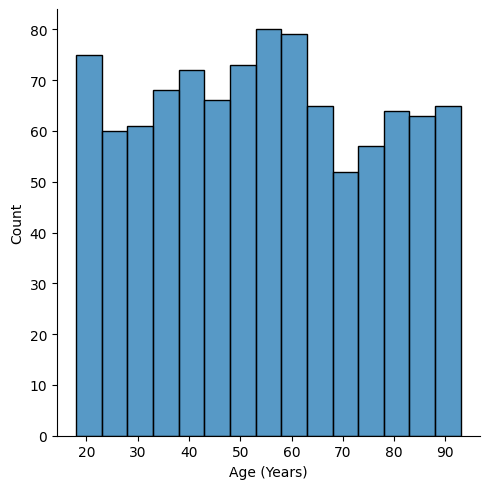

In [15]:
univariate_plot1= sns.displot(data, x='Age (Years)',binwidth=5)

b. Dependents, fixing data errors with seaborn itself.

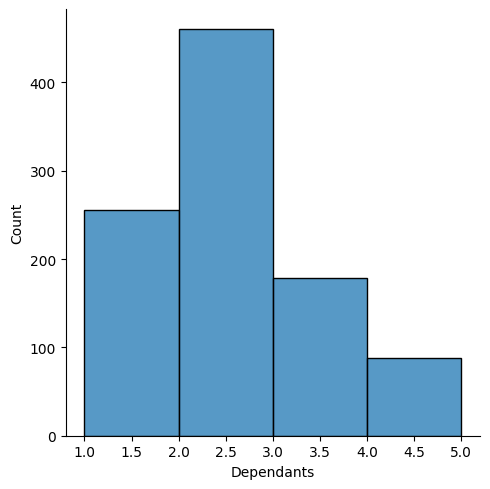

In [12]:
univariate_plot2=sns.displot(data, x='Dependants',bins=[1,2,3,4,5])

c. Age (of default bins), conditioned on Marital Status.

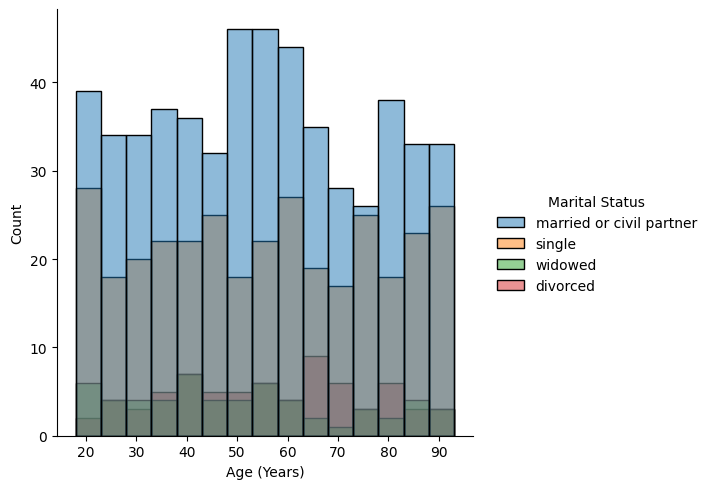

In [13]:
univariate_plot3=sns.displot(data, x='Age (Years)',binwidth=5,hue='Marital Status')

### 3. Perform multivariate plots with the following data attributes:
a. Commuted distance against salary.

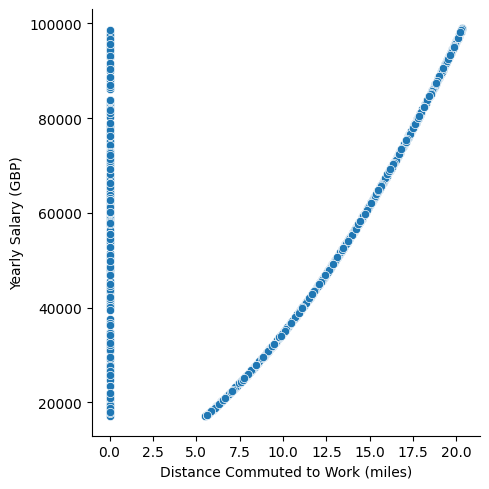

In [21]:
multivariate_plot1=sns.relplot(data,x='Distance Commuted to Work (miles)',y='Yearly Salary (GBP)')

b. Age against Salary.

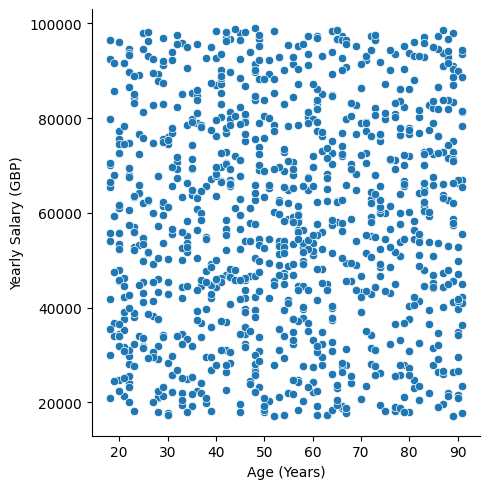

In [22]:
multivariate_plot2=sns.relplot(data, x='Age (Years)',y='Yearly Salary (GBP)')

c. Age against Salary conditioned by Dependants.

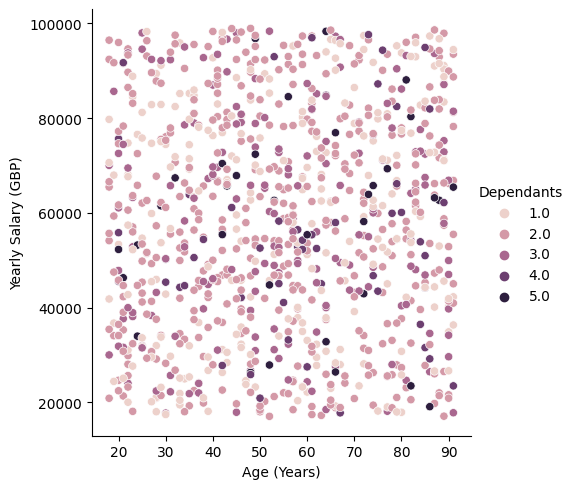

In [23]:
multivariate_plot3=sns.relplot(data, x='Age (Years)',y='Yearly Salary (GBP)',hue = 'Dependants')

### Your client would like the ability to save the plots which you have produced. 
Provide a Notebook cell which can do this. 

In [26]:
figures_to_save={}
figures_to_save["./univariate_plot1.png"]=univariate_plot1
figures_to_save["./univariate_plot2.png"]=univariate_plot2
figures_to_save["./univariate_plot3.png"]=univariate_plot3
figures_to_save["./multivariate_plot1.png"]=multivariate_plot1
figures_to_save["./multivariate_plot2.png"]=multivariate_plot2
figures_to_save["./multivariate_plot3.png"]=multivariate_plot3

figures_to_save

{'./univariate_plot1.png': <seaborn.axisgrid.FacetGrid at 0x1ee5b62f7d0>,
 './univariate_plot2.png': <seaborn.axisgrid.FacetGrid at 0x1ee5937d6d0>,
 './univariate_plot3.png': <seaborn.axisgrid.FacetGrid at 0x1ee59313b90>,
 './multivariate_plot1.png': <seaborn.axisgrid.FacetGrid at 0x1ee5e3743d0>,
 './multivariate_plot2.png': <seaborn.axisgrid.FacetGrid at 0x1ee5b51a150>,
 './multivariate_plot3.png': <seaborn.axisgrid.FacetGrid at 0x1ee5b753e10>}

In [27]:
for key in figures_to_save:
    figures_to_save[key].savefig(key)